<a href="https://colab.research.google.com/github/tathatj/Machine_learning/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Loading data set

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Smarket.csv')

In [0]:
print(df.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


##LDA

In [0]:

X = df.iloc[:,1:8].values
y = df.iloc[:,8].values




In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[114   9]
 [  0 127]]
Accuracy 0.964


##LDA with different step size

In [0]:
import numpy as np
size=np.arange(0.1,1,step=0.1)

In [0]:
import matplotlib.pyplot as plt

In [0]:
def acc_score(size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=0)
  X_train = lda.fit(X_train, y_train)
  y_pred = lda.predict(X_test)
  return (accuracy_score(y_test, y_pred))
  
  
  
  

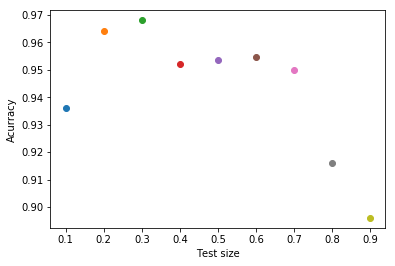

In [0]:
for i in size:
  plt.plot(i,acc_score(i),'o')
  plt.xlabel('Test size')
  plt.ylabel('Acurracy')

##LDA with transform and ensemble

In [0]:
X = df.iloc[:,1:8].values
y = df.iloc[:,8].values


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[118   5]
 [  0 127]]
Accuracy 0.98
